In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Hotel_Reviews.csv



# **About the Dataset**
The data was scraped from **Booking.com**. All data in the file is publicly available to everyone already. Data is originally owned by **Booking.com**.

In [21]:
#loading the dataset from the Hotel_reviews dataset
df = pd.read_csv("../input/Hotel_Reviews.csv")

# **Data Analysis**

In [22]:
#printing the columns names of the datset
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [23]:
#printing the shape of the dataset
df.shape

(515738, 17)

In [24]:
df.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


This dataset contains **515,000  customer reviews** and scoring of **1493  Luxury Hotels** across Europe.

The csv file contains 17 fields. The description of each field is as below:

* **Hotel_Address**: Address of hotel.
* **Review_Date**: Date when reviewer posted the corresponding review.
* **Average_Score**: Average Score of the hotel, calculated based on the latest comment in the last year.
* **Hotel_Name**: Name of Hotel
* **Reviewer_Nationality**: Nationality of Reviewer
* **Negative_Review**: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
* **Review_Total_Negative_Word_Counts**: Total number of words in the negative review.
* **Positive_Review**: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
* **Review_Total_Positive_Word_Counts**: Total number of words in the positive review.
* **Reviewer_Score**: Score the reviewer has given to the hotel, based on his/her experience
* **Total_Number_of_Reviews_Reviewer_Has_Given**: Number of Reviews the reviewers has given in the past.
* **Total_Number_of_Reviews**: Total number of valid reviews the hotel has.
* **Tags**: Tags reviewer gave the hotel.
* **days_since_review**: Duration between the review date and scrape date.
* **Additional_Number_of_Scoring**: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
* **lat**: Latitude of the hotel
* **lng**: longtitude of the hotel


Meanwhile, the geographical location of hotels are also provided for further analysis.

### Checking whether there are any missing values in the dataset.

In [25]:
import missingno as msno

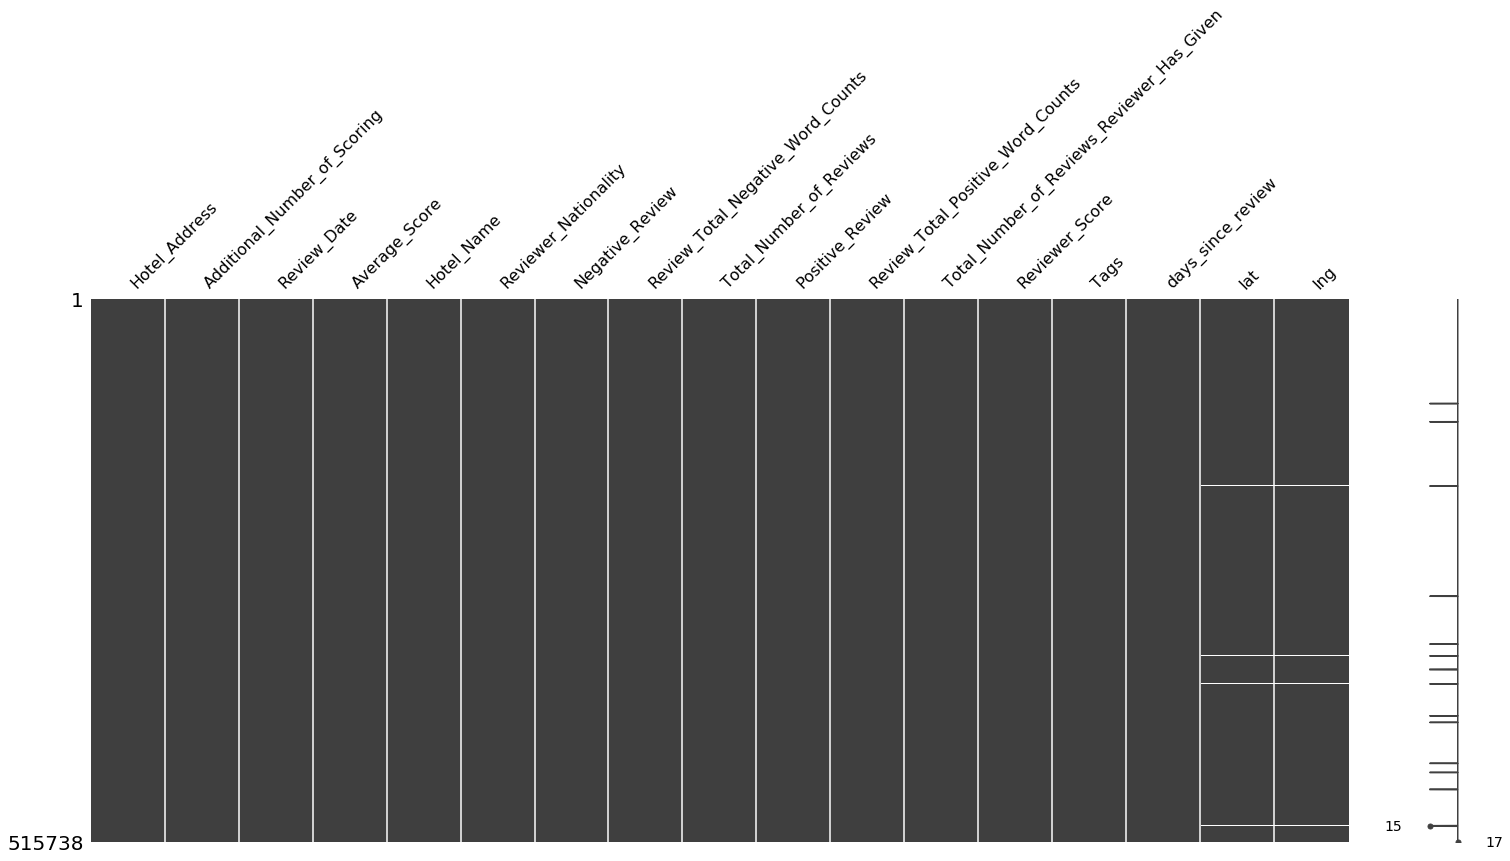

In [26]:
msno.matrix(df)

*  ### From the above plot we can see there are some missing values in  **lat**(Latitude) and **lng**(Longitude) attributes in the dataset. 
* ### Lets look at the missing values in the dataset.

In [27]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)

In [28]:
nans_df = nans_df[['Hotel_Name','lat','lng']]
nans_df.head(10)

,Hotel_Name,lat,lng
99488,Mercure Paris Gare Montparnasse,NaN,NaN
99489,Mercure Paris Gare Montparnasse,NaN,NaN
99490,Mercure Paris Gare Montparnasse,NaN,NaN
99491,Mercure Paris Gare Montparnasse,NaN,NaN
99492,Mercure Paris Gare Montparnasse,NaN,NaN
99493,Mercure Paris Gare Montparnasse,NaN,NaN
99494,Mercure Paris Gare Montparnasse,NaN,NaN
99495,Mercure Paris Gare Montparnasse,NaN,NaN
99496,Mercure Paris Gare Montparnasse,NaN,NaN
99497,Mercure Paris Gare Montparnasse,NaN,NaN


* We see that there are about **3268  Nan** (missing values) in the dataset.

* Instead of removing the **Nan** values from the dataset,
Try to fill the **Nan** values with the similar **Hotel_Addresses *lat, lng* values**  in the dataset. 
If the **Hotel_Address** is matched with the other rows(i.e Nan valued rows) in the dataset, Fill the **Nan** values in the dataset with the matched values(i.e., **lat**,**lng**).

In [29]:
df = df.fillna(method = 'ffill').fillna(method = 'bfill')
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df.shape

(0, 17)

## Now all the missing are filled in the dataset.
lets look at them in detail.

In [30]:
#checking whether the data is filled or not
temp_df = df[['Hotel_Name','lat','lng']]
temp_df.iloc[99492:99515]

,Hotel_Name,lat,lng
99492,Mercure Paris Gare Montparnasse,48.847346,2.283241
99493,Mercure Paris Gare Montparnasse,48.847346,2.283241
99494,Mercure Paris Gare Montparnasse,48.847346,2.283241
99495,Mercure Paris Gare Montparnasse,48.847346,2.283241
99496,Mercure Paris Gare Montparnasse,48.847346,2.283241
99497,Mercure Paris Gare Montparnasse,48.847346,2.283241
99498,Mercure Paris Gare Montparnasse,48.847346,2.283241
99499,Mercure Paris Gare Montparnasse,48.847346,2.283241
99500,Mercure Paris Gare Montparnasse,48.847346,2.283241
99501,Mercure Paris Gare Montparnasse,48.847346,2.283241


In [31]:
#saving the data to pickle files
df.to_pickle('After_filling_Nans')

In [32]:
#loading the data from the pickle file
df = pd.read_pickle('After_filling_Nans')

Let's plot interactive map visualitation inorder to see where the Hotels are located in Europe.
we are using the beautiful map visualization library called folium. (if you want to know more about folium library check out this link    https://media.readthedocs.org/pdf/folium/latest/folium.pdf

In [33]:
#importing map visualization library
import folium

In [34]:
#finding the minimam and maximum lat and lng values.
df['lat'].min(),df['lat'].max(),df['lng'].min(),df['lng'].max()

(41.328375799999996, 52.4001813, -0.36975809999999998, 16.429232899999999)

In [35]:
#Gathering the unique latitude values
uniq_lat = set(df['lat'])
uniq_lat = list(uniq_lat)
print("No of unique latitude values in the dataset are {}".format(len(uniq_lat)))

No of unique latitude values in the dataset are 1472


In [36]:
#Gathering the unique longitude values
uniq_lng = set(df['lng'])
uniq_lng = list(uniq_lng)
print("No of unique longitude values in the dataset are {}".format(len(uniq_lng)))

No of unique longitude values in the dataset are 1472


We see that there are **1472** latitudes and longitude values available, since there are 1492 Hotels information in the datase. Therefore, **20** Hotel lat and lng values are missing.

In [39]:
#making the uniq_lat and uniq_lng into dataframe.
uniq_lat_lng = pd.DataFrame()
uniq_lat_lng['lat'] = uniq_lat
uniq_lat_lng['lng'] = uniq_lng
uniq_lat_lng.head(10)
print(len(uniq_lat_lng))

1472


**Let's plot the 1472  unique location's on the map.**

In [41]:
Lat_Lng_Coordinates = (47,6)#view the Hotel's locations in the map
# create empty map zoomed in on Europe using Stemen Terrain View
map_osm = folium.Map(location=Lat_Lng_Coordinates, zoom_start=5, tiles = 'Stamen Terrain')
# add a marker for every Hotel in the dataframe
for i,j in uniq_lat_lng.iterrows():
    folium.Marker(list((j['lat'],j['lng']))).add_to(map_osm)
map_osm

**As you can see above that there are some points just outside the land surface but many of them points are plotted correctly.**